# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Atilla Fejril
- **Email:** atillafejril10@gmail.com
- **ID Dicoding:** Atilla Fejril

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh antara holiday, dan workingday dengan penyewaan sepeda?
2. Bagaimana pengaruh antar musim-musim dengan penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd # import library pandas
import numpy as np # import library numpy
import seaborn as sns  # import library seaborn
import matplotlib.pyplot as plt # import library matplotlib

## Data Wrangling

### Gathering Data

In [2]:
dshour = pd.read_csv("/content/sample_data/hour.csv") # membaca data set yang telah diberikan
dsday = pd.read_csv("/content/sample_data/day.csv") # membaca data set yang telah diberikan

### Assessing Data

In [3]:
dshour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
dsday.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


setelah kita lihat informasi yang diberikan oleh fungsi describe(), maka dapat disimpulkan bahwa tidak ada keanehan didalam data yang kita punya

In [5]:
dshour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
dsday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


setelah kita lihat informasi yang diberikan oleh fungsi info(), ada sedikit keanehan yaitu pada feature dteday. Disini diberitahu bahwa tipe data dari dteday adalah object maka kita harus mengubahnya

In [7]:
dsday.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
dshour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

setelah kita lihat informasi yang diberikan oleh fungsi isnull(), kita mengetahui bahwa tidak ada missing value didalam data set yang kita miliki

In [9]:
dsday.duplicated().sum()

0

In [10]:
dshour.duplicated().sum()

0

setelah kita lihat informasi yang diberikan oleh fungsi duplicated(), kita mengetahui bahwa tidak ada data yang duplikat

In [11]:
dshour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
dsday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning Data

karena tidak ada masalah yang umum kita jumpai dan hanya ada masalah bahwa ada tipe data yang berbentuk objek, maka disini tipe data dari dteday akan diubah

In [13]:
dsday['dteday'] = pd.to_datetime(dsday['dteday'])

In [14]:
dshour['dteday'] = pd.to_datetime(dshour['dteday'])

In [15]:
dsday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
dshour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

setelah menggunakan fungsi info(), maka kita sudah mengetahui bahwa tipe data dari dteday sudah berubah dari objek menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

Yang ingin saya lakukan pertama kali untuk bagian EDA adalah melihat korelasi antar feature yang ada di dataset dengan cnt sebagai parameternya

In [17]:
dsday.corr()

<ipython-input-17-6ff9ab6f28a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dsday.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [18]:
dshour.corr()

<ipython-input-18-092714e26f33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dshour.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


jika kita lihat disini korelasi feature cnt dengan feature weekday, workingday, holiday, dan season (sesuai dengan pertanyaan) maka lebih baik menggunakan dataset day. Lalu kita akan memilih fitur-fitur yang memiliki kesinambungan dengan pertanyaan kita tanpa mendrop nya karena ingin menjaga semua informasi yang ada.

In [19]:
dsdayu = dsday[['weekday','cnt','season','holiday','workingday']]

In [20]:
dsdayu['season'] = dsdayu['season'].map({
    1 : 'Musim semi', 2 : 'Musim panas', 3 : 'Musim gugur', 4 : 'Musim dingin'
})
dsdayu['weekday'] = dsdayu['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})


<ipython-input-20-6436a0f0357b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsdayu['season'] = dsdayu['season'].map({
<ipython-input-20-6436a0f0357b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsdayu['weekday'] = dsdayu['weekday'].map({


Kita ubah nama dari nilai-nilai yang ada di season dan weekday agar dapat lebih mudah dipahami

In [21]:
dsdayu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   weekday     731 non-null    object
 1   cnt         731 non-null    int64 
 2   season      731 non-null    object
 3   holiday     731 non-null    int64 
 4   workingday  731 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 28.7+ KB


maka dari sini kita bisa mengetahui bahwa didalam dataset kita sudah tidak terdapat feature-feature yang tidak kita gunakan

In [22]:
dsdayu.groupby(by ='season').agg({
    'cnt': ('mean','max','min')
})

cnt            
                     mean   max   min
season                               
Musim dingin  4728.162921  8555    22
Musim gugur   5644.303191  8714  1115
Musim panas   4992.331522  8362   795
Musim semi    2604.132597  7836   431

Berdasarkan data diatas dapat dilihat bahwa musim yang memiliki rata-rata terbesar adalah Musim gugur dan yang terkecil adalah Musim semi

In [23]:
dsdayu.groupby(by ='holiday').agg({
    'cnt': ('mean','max','min')
})

cnt            
                mean   max   min
holiday                         
0        4527.104225  8714    22
1        3735.000000  7403  1000

Berdasarkan hasil diatas dapat dilihat bahwa orang-orang lebih suka menyewa sepeda saat bukan hari libur

In [24]:
dsdayu.groupby(by ='weekday').agg({
    'cnt': ('mean','max','min')
})

cnt            
                mean   max   min
weekday                         
Fri      4690.288462  8362  1167
Mon      4338.123810  7525    22
Sat      4550.542857  8714   627
Sun      4228.828571  8227   605
Thu      4667.259615  7804   431
Tue      4510.663462  7767   683
Wed      4548.538462  8173   441

Berdasarkan hasil diatas dapat dilihat bahwa hari yang memiliki rata-rata terbesar adalah hari jumat dan yang terkecil adalah hari minggu

In [25]:
dsdayu.groupby(by ='workingday').agg({
    'cnt': ('mean','max','min')
})

cnt           
                   mean   max  min
workingday                        
0           4330.168831  8714  605
1           4584.820000  8362   22

Berdasarkan hasil diatas dapat dilihat bahwa orang-orang lebih suka menyewa sepeda saat hari bekerja

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh antara holiday, dan workingday dengan penyewaan sepeda?


<ipython-input-26-81fef52c8eee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsdayu['holiday'] = dsdayu['holiday'].map({
<ipython-input-26-81fef52c8eee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsdayu['workingday'] = dsdayu['workingday'].map({


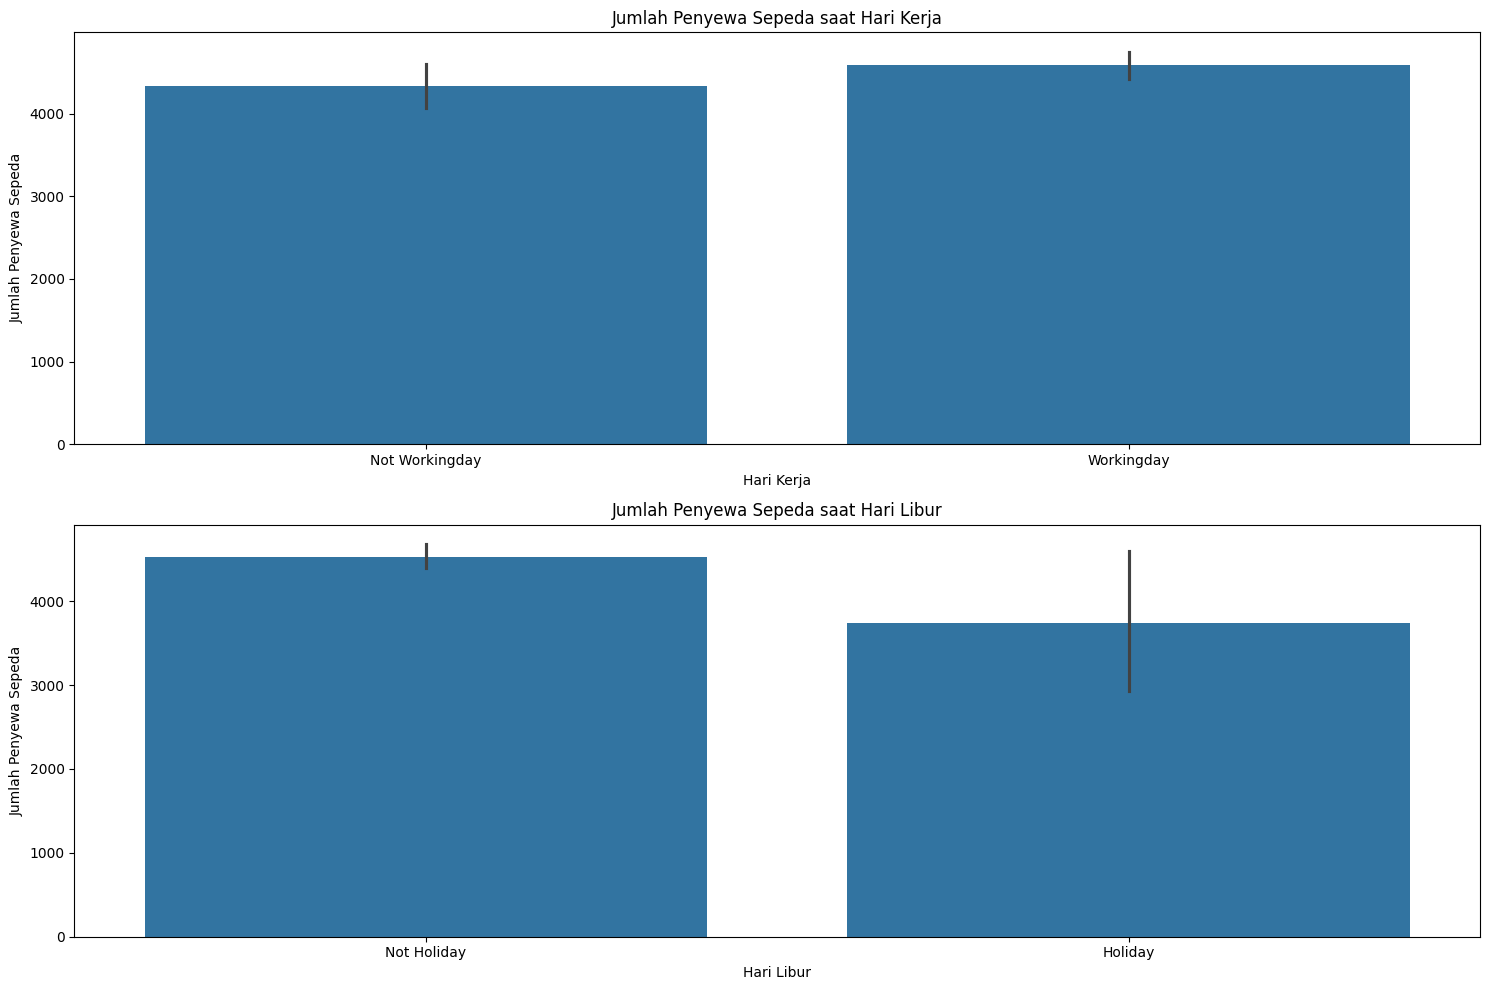

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
dsdayu['holiday'] = dsdayu['holiday'].map({
    0 : 'Not Holiday', 1 : 'Holiday'
})
dsdayu['workingday'] = dsdayu['workingday'].map({
    0 : 'Not Workingday', 1 : 'Workingday'
})

sns.barplot(
    x='workingday',
    y='cnt',
    data=dsdayu,
    ax=axes[0])
axes[0].set_title('Jumlah Penyewa Sepeda saat Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Penyewa Sepeda')

sns.barplot(
  x='holiday',
  y='cnt',
  data=dsdayu,
  ax=axes[1])
axes[1].set_title('Jumlah Penyewa Sepeda saat Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Penyewa Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data menggunakan barplot, dapat kita simpulkan sebagai berikut:
1. Jumlah penyewa sepeda lebih banyak pada hari kerja (senin - jumat) daripada akhir pekan (sabtu - minggu)
2. Jumlah penyewa sepeda lebih banyak pada hari tidak libur ketimbang hari libur

### Pertanyaan 2: Bagaimana pengaruh antar musim dengan penyewaan sepeda?

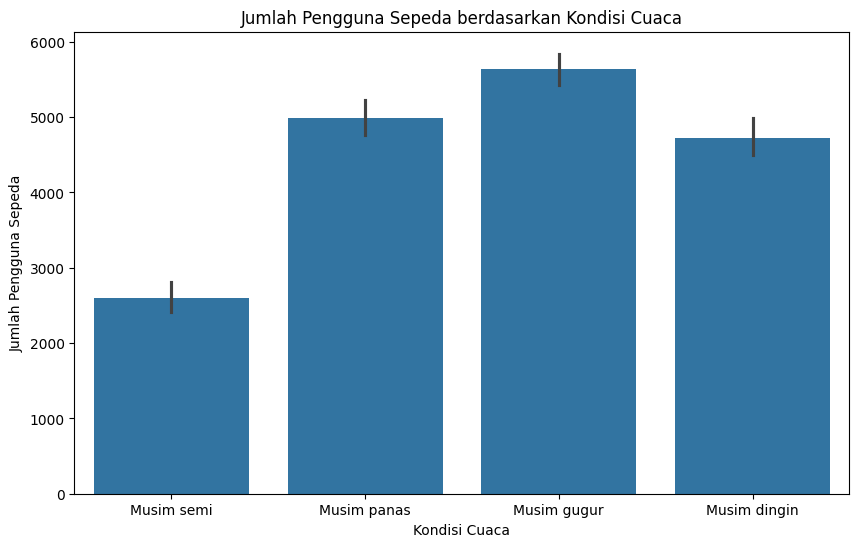

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='cnt',
    data=dsdayu)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan visualisasi data menggunakan barplot, dapat disimpulkan bahwa jelas terdapat hubungan antara musim dan penyewa sepeda. Pada musim gugur menjadi musim yang sangat diminati orang-orang untuk menyewa sepeda, diikuti dengan musim panas, lalu musim dingin, dan yang terakhir adalah musim semi


In [29]:
dsday.to_csv("all_data.csv", index=False)

## Conclusion

Conclution pertanyaan 1 :
Dari hasil visualisasi yang telah dibuat, bisa kita simpulkan bahwa:

- Hari Kerja (Workingday):

1. Jumlah penyewa sepeda sedikit lebih tinggi saat hari kerja.
2. Walaupun perbedaannya tidak terlalu besar, namun hari kerja lebih tinggi jumlahnya ketimbang akhir pekan atau hari libur.
3. Ini memberikan kita informasi bahwa orang lebih berminat untuk menyewa sepeda saat hari kerja, mungkin dikarenakan orang menyewa sepeda untuk pergi bekerja.


- Hari Libur (Holiday):

1. Berbanding terbalik, pada hari libur justru tidak diminati oleh para penyewa sepeda.
2. Jumlah penyewa sepeda jauh lebih tinggi pada hari tidak libur.
3. Ini memberi kita informasi bahwa orang lebih memilih menyewa sepeda saat mereka melakukan hal yang produktif seperti bekerja, dll. Oleh karena itu jumlah penyewa sepeda saat hari libur jauh lebih rendah dari hari biasa.

Conclution pertanyaan 2 : Dari hasil visualisasi yang telah dibuat, bisa kita simpulkan bahwa musim gugur menjadi yang paling diminati oleh orang-orang untuk menyewa sepeda. Lalu setelah musim gugur diikuti oleh musim panas, lalu musim dingin dan yang paling tidak diminati adalah musim semi